In [1]:
import os
print(os.getcwd())

c:\Users\dkreh\Desktop\KDT_RE_5th\3_Project\01_DataAnalysis


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


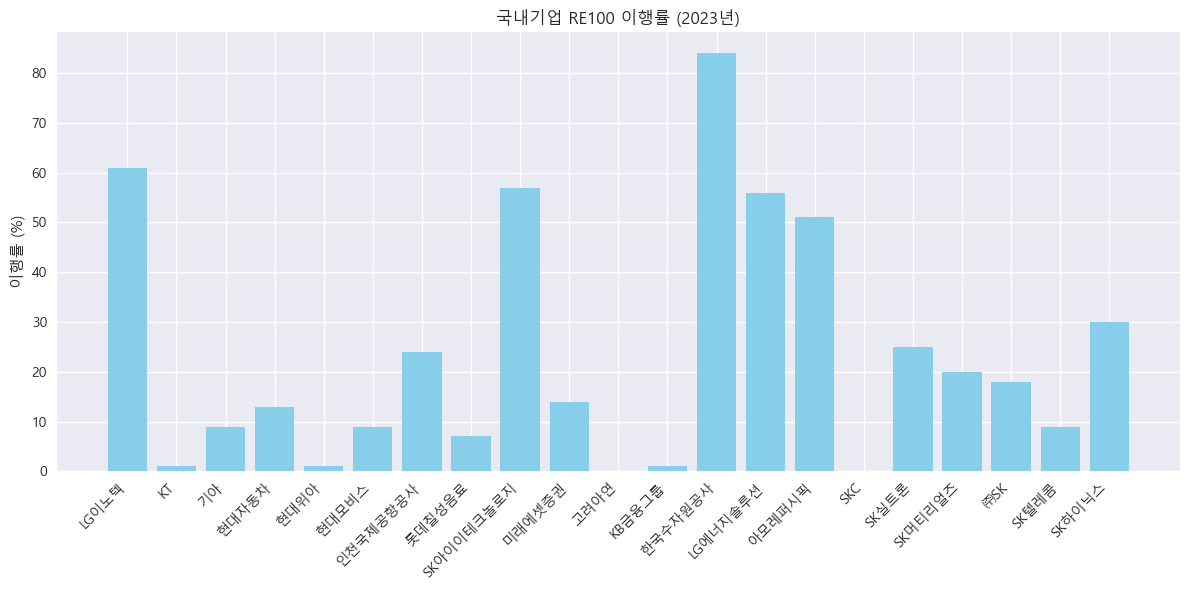

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("data/policy/k_re100_companies_all.csv")

df['RE100 달성률'] = df['RE100 목표/달성률'].str.extract(r'\((\d+)%\)')[0].astype(int)

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(12,6))
plt.bar(df['기업명'], df['RE100 달성률'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("국내기업 RE100 이행률 (2023년)")
plt.ylabel("이행률 (%)")
plt.tight_layout()

# 5. 그래프 출력
plt.show()

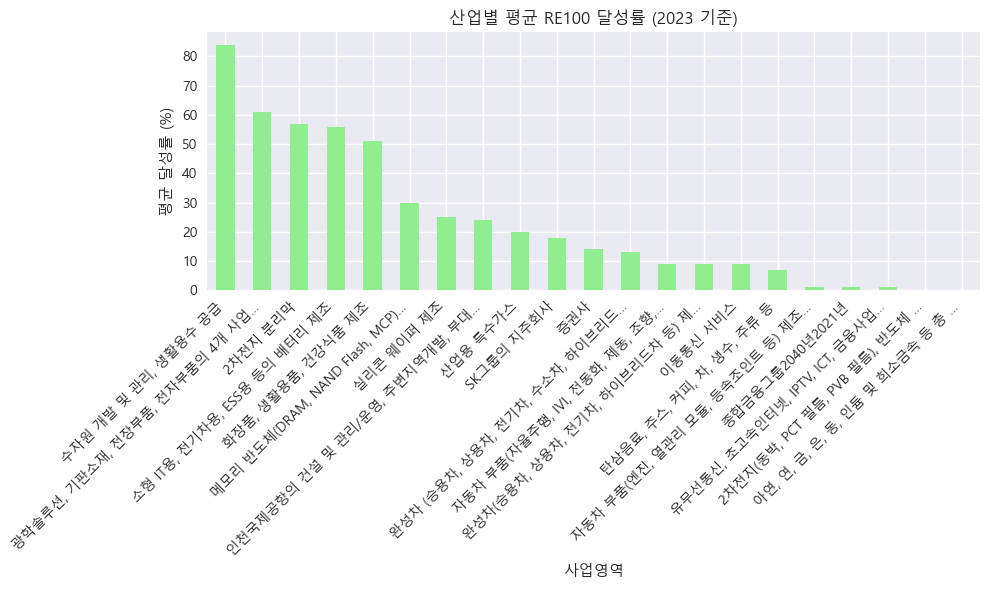

In [ ]:
industry_avg = df.groupby("사업영역")["RE100 달성률"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
industry_avg.plot(kind="bar", color="lightgreen")
plt.title("산업별 평균 RE100 달성률 (2023 기준)")
plt.ylabel("평균 달성률 (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

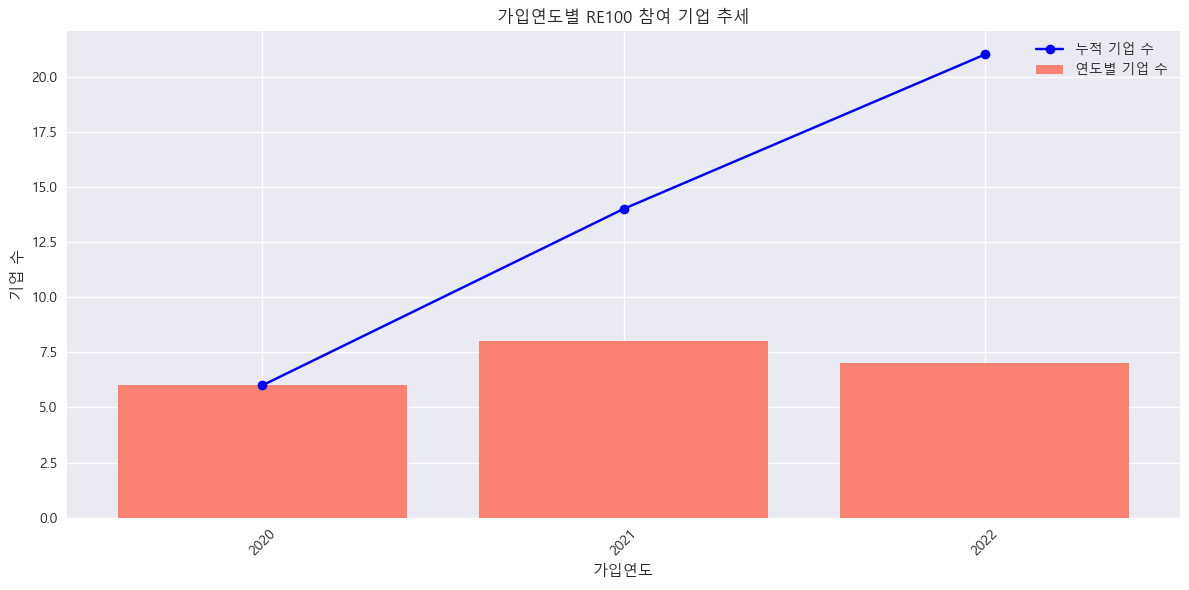

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


join_counts = df['가입연도'].value_counts().sort_index()


years = range(join_counts.index.min(), join_counts.index.max()+1)

plt.figure(figsize=(12,6))
plt.bar(join_counts.index, join_counts.values, color="salmon", label="연도별 기업 수")

cumsum = join_counts.cumsum()
plt.plot(join_counts.index, cumsum, color="blue", marker="o", label="누적 기업 수")

plt.xticks(years, rotation=45)

plt.title("가입연도별 RE100 참여 기업 추세")
plt.xlabel("가입연도")
plt.ylabel("기업 수")
plt.legend()
plt.tight_layout()
plt.show()